In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("BreastCancer - KNN.csv")

In [3]:
data.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [4]:
data.dtypes

pelvic_incidence            float64
pelvic_tilt numeric         float64
lumbar_lordosis_angle       float64
sacral_slope                float64
pelvic_radius               float64
degree_spondylolisthesis    float64
class                        object
dtype: object

In [5]:
colnames_numeric = data.columns[0:6]

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[colnames_numeric] = scaler.fit_transform(data[colnames_numeric])

In [7]:
data.shape

(310, 7)

In [8]:
import random
def train_test_split(data, split, trainingSet = [], testSet = []):
    for x in range(len(data)):
        if random.random() < split:
            trainingSet.append(data[x])
        else:
            testSet.append(data[x])

In [37]:
df = data.values.tolist()
trainingSet = []
testSet = []
split = 0.66
train_test_split(df, split, trainingSet, testSet)

In [38]:
print(len(trainingSet))
print(len(testSet))

202
108


In [11]:
import math
def Euclideandist(x,xi, length):
    d = 0.0
    for i in range(length):
        d += pow(float(x[i])- float(xi[i]),2)
    return math.sqrt(d)

In [12]:
import operator
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = Euclideandist(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [13]:
import operator
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0] 

In [14]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

In [39]:
predictions=[]
k = 3
for x in range(len(testSet)):
    neighbors = getNeighbors(trainingSet, testSet[x], k)
    result = getResponse(neighbors)
    predictions.append(result)
    print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))

> predicted='Abnormal', actual='Abnormal'
> predicted='Normal', actual='Abnormal'
> predicted='Normal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Normal', actual='Abnormal'
> predicted='Normal', actual='Abnormal'
> predicted='Normal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Normal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Normal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Normal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Abnormal', actual='Abnormal'
> predicted='Normal', actual='Abnormal'
> predicte

In [40]:
accuracy = getAccuracy(testSet, predictions)
print('Accuracy: ' + repr(accuracy) + '%')

Accuracy: 75.92592592592592%


## Fonksiyonlar yazılmadan direkt kütüphane üzerinden KNN Hesaplaması

In [41]:
trainingSet2 = pd.DataFrame(np.array(trainingSet).reshape(len(trainingSet),7), columns = data.columns)
testSet2 = pd.DataFrame(np.array(testSet).reshape(len(testSet),7), columns = data.columns)

In [42]:
trainingSet2[colnames_numeric] = trainingSet2[colnames_numeric].apply(pd.to_numeric, errors = 'coerce', axis = 0)

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)
x_train,y_train = trainingSet2.loc[:,trainingSet2.columns != 'class'], trainingSet2.loc[:,'class']
x_test,y_test = testSet2.loc[:,testSet2.columns != 'class'], testSet2.loc[:,'class']

In [44]:
from sklearn import metrics
Ks = 10

mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.76851852, 0.82407407, 0.75925926, 0.80555556, 0.7962963 ,
       0.80555556, 0.82407407, 0.80555556, 0.78703704])

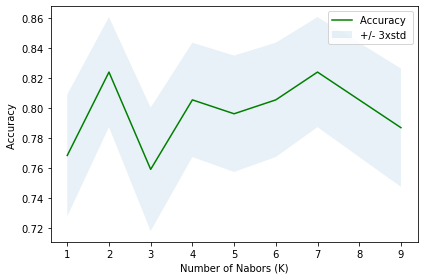

In [45]:
import matplotlib.pyplot as plt
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [46]:
print( "En yüksek Doğruluk=", mean_acc.max(), "K=", mean_acc.argmax()+1,"olduğunda gerçekleşti.")

En yüksek Doğruluk= 0.8240740740740741 K= 2 olduğunda gerçekleşti.


In [47]:
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
print('Prediction: {}'.format(prediction))
print('With KNN (K=2) accuracy is: ',knn.score(x_test,y_test))

Prediction: ['Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Normal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Normal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal' 'Abnormal'
 'Normal' 'Normal' 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Normal'
 'Abnormal' 'Normal' 'Abnormal' 'Abnormal' 'Normal' 'Abnorm